In [18]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
#load the data
df = pd.read_csv('datasets/petrol_consumption.csv')
print('Petrol consumption Data\n',df)

Petrol consumption Data
     Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.00            3571            1976                         0.525   
1         9.00            4092            1250                         0.572   
2         9.00            3865            1586                         0.580   
3         7.50            4870            2351                         0.529   
4         8.00            4399             431                         0.544   
5        10.00            5342            1333                         0.571   
6         8.00            5319           11868                         0.451   
7         8.00            5126            2138                         0.553   
8         8.00            4447            8577                         0.529   
9         7.00            4512            8507                         0.552   
10        8.00            4391            5939                         0.530   
11        7.50 

In [21]:
# separate the input and output variable
x = df.drop('Petrol_Consumption', axis = 1) 
y = df['Petrol_Consumption']#output variable

In [6]:
x.corrwith(y) #to check for linear regression

Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
dtype: float64

In [22]:
#cross validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [8]:
x_train.shape, x_test.shape, y_test.shape, y_test.shape

((36, 4), (12, 4), (12,), (12,))

In [43]:
# build the model
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(random_state = 0, n_estimators = 20)
regressor_rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [44]:
# performance evaluation
y_pred = regressor_rf.predict(x_test)

In [45]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [46]:
mean_absolute_error(y_test, y_pred)

58.00833333333333

In [47]:
mean_absolute_percentage_error(y_test, y_pred)

0.11049193717501382

In [48]:
result = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result

,Actual,Predicted
29,534,577.65
4,410,521.05
26,577,624.65
30,571,638.95
32,577,629.40
37,704,616.30
34,487,616.35
40,587,555.45
7,467,465.90
10,580,575.30


In [49]:
np.sqrt(mean_squared_error(y_test, y_pred))

69.17301376500328

In [50]:
regressor_rf.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=209652396),
 DecisionTreeRegressor(max_features=1.0, random_state=398764591),
 DecisionTreeRegressor(max_features=1.0, random_state=924231285),
 DecisionTreeRegressor(max_features=1.0, random_state=1478610112),
 DecisionTreeRegressor(max_features=1.0, random_state=441365315),
 DecisionTreeRegressor(max_features=1.0, random_state=1537364731),
 DecisionTreeRegressor(max_features=1.0, random_state=192771779),
 DecisionTreeRegressor(max_features=1.0, random_state=1491434855),
 DecisionTreeRegressor(max_features=1.0, random_state=1819583497),
 DecisionTreeRegressor(max_features=1.0, random_state=530702035),
 DecisionTreeRegressor(max_features=1.0, random_state=626610453),
 DecisionTreeRegressor(max_features=1.0, random_state=1650906866),
 DecisionTreeRegressor(max_features=1.0, random_state=1879422756),
 DecisionTreeRegressor(max_features=1.0, random_state=1277901399),
 DecisionTreeRegressor(max_features=1.0, random_state=1682652230),
 D

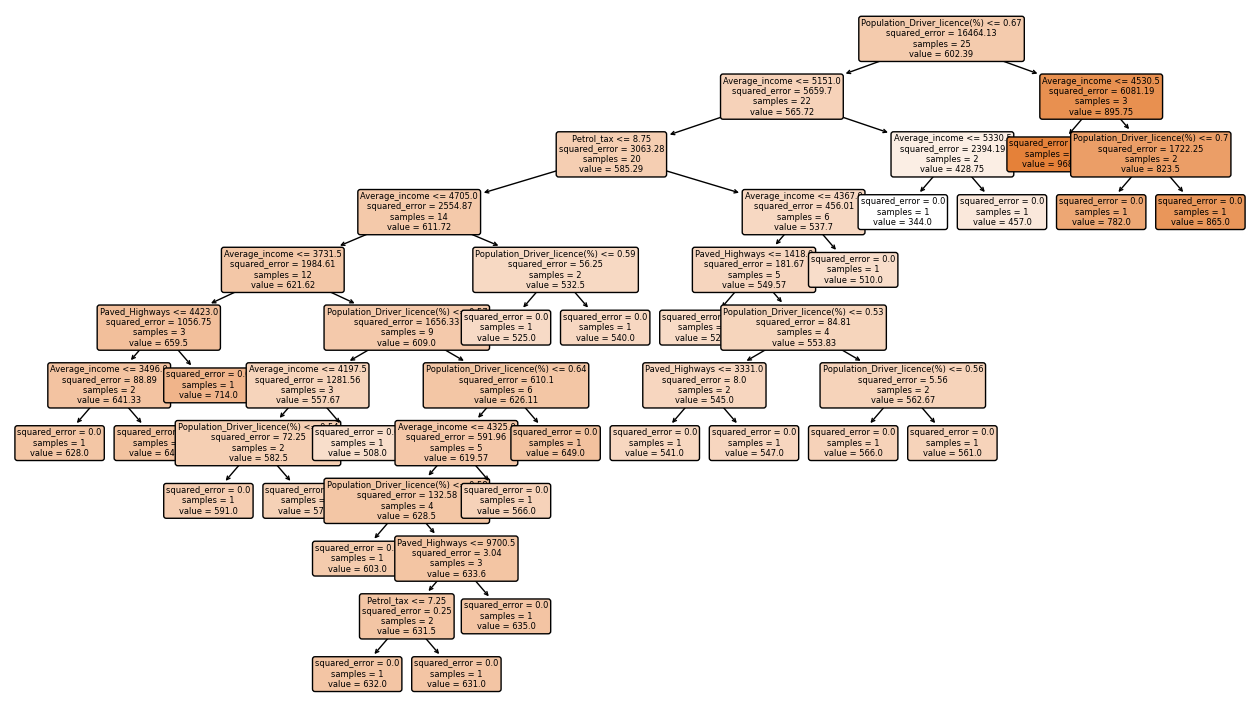

In [54]:
# visualization of tree
from sklearn.tree import plot_tree
plt.figure(figsize = (16,9))
plot_tree(regressor_rf.estimators_[0], fontsize=6, feature_names=x.columns, filled = True, precision=2, class_names=['O', 'F'], rounded=True);